In [10]:
from src.common import loadDatasetFromFilepath
import numpy as np
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt

In [8]:
X_train, X_test, y_train, y_test = loadDatasetFromFilepath('../data/bank-full.csv')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30291, 41), (14920, 41), (30291,), (14920,))

In [13]:
model = XGBClassifier(learning_rate=0.1,
                      n_estimators=1000,         # 树的个数--1000棵树建立xgboost
                      max_depth=6,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=0.8,             # 随机选择80%样本建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27   ,         # 随机数
                      )
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
y_test_pre = model.predict(X_test)

In [15]:
print("Correct cases:    {} / {}".format(np.sum(y_test_pre==y_test), len(y_test)))
print("Accuracy:         {}".format(np.sum(y_test_pre==y_test) / len(y_test)))
print("MCC score:        {}".format(matthews_corrcoef(y_test, y_test_pre)))

Correct cases:    14920 / 14920
Accuracy:         1.0
MCC score:        1.0


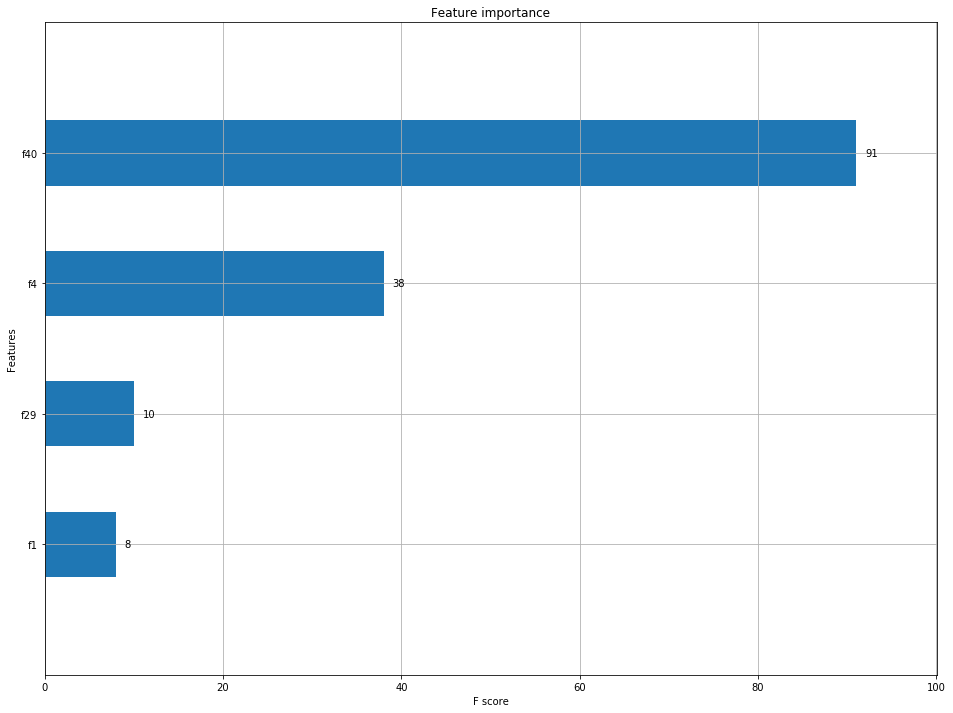

In [18]:
fig,ax = plt.subplots(figsize=(16,12))
plot_importance(model,height=0.5,ax=ax)
plt.show()

In [20]:
model._Booster.feature_names

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40']

In [21]:
model.feature_importances_

array([0.0000000e+00, 1.5847167e-05, 0.0000000e+00, 0.0000000e+00,
       9.6245429e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 5.0149680e-05, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       9.9983770e-01], dtype=float32)